<a href="https://colab.research.google.com/github/Manojpatil123/Machine-learning-Assignments/blob/main/Assignment_Support_Vector_Machine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <u><b> Objective </b></u>
## <b> You are given a data of US Airline tweets and their sentiment. The task is to do sentiment analysis about the problems of each major U.S. airline. Twitter data was scraped from February of 2015 and contributors were asked to first classify positive, negative, and neutral tweets, followed by categorizing negative reasons (such as "late flight" or "rude service"). </b>

<br>
<br>

## <b>Things to do :</b>
* ### Read the tweets.csv data, clean and tokenize the tweets using nltk library.
* ### Count vectorize the tweets so that you end up with a sparse matrix (which will be your $X$). 
* ### You are supposed to build a SVM classifier (a binary classification in fact). Since the data contains three levels of sentiment(positive, negative and neutral), you should remove the sentences which are neutral. Once you do that you will have two classes only (positive and negative). You can set the label of positive tweets to 1 and negative tweets to 0.
* ### Once you have built the SVM classifier, evaluate this model across various metrics. Also plot the ROC curve and Precision-Recall curve. Report the areas under these two curves along with other metrics.
* ### Perform GridSearch cross validation for various values of $C$ and $gamma$. These will be the hyperparameters which you would play around with.
* ### Explain your observations and the underlying reasons for these.
* ### Try checking if <code>tfidfvectorizer</code> helps you gain lift in model's performance.





In [ ]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, plot_precision_recall_curve


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/AlmaBetter/Module 3/Week 3/Day 3/Tweets.csv')

In [ ]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials to the experience... tacky.,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I need to take another trip!,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing about it,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

We are mainly concerned with the airline sentiment and text column which look fine based on info.

In [ ]:
df.describe()

,tweet_id,airline_sentiment_confidence,negativereason_confidence,retweet_count
count,1.464000e+04,14640.000000,10522.000000,14640.000000
mean,5.692184e+17,0.900169,0.638298,0.082650
std,7.791112e+14,0.162830,0.330440,0.745778
min,5.675883e+17,0.335000,0.000000,0.000000
25%,5.685592e+17,0.692300,0.360600,0.000000
50%,5.694779e+17,1.000000,0.670600,0.000000
75%,5.698905e+17,1.000000,1.000000,0.000000
max,5.703106e+17,1.000000,1.000000,44.000000


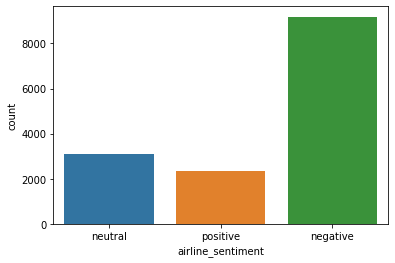

In [ ]:
sns.countplot(x=df['airline_sentiment'])

Most tweets are negative according to the airline.

In [ ]:
df['length']=df['text'].apply(len)


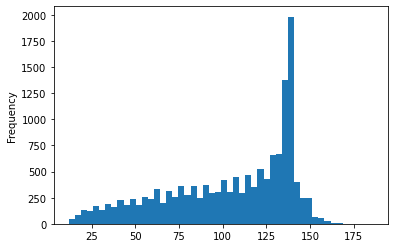

In [ ]:
df['length'].plot(bins=50,kind='hist')

In [ ]:
df['length'].describe()

count    14640.000000
mean     103.822063  
std      36.277339   
min      12.000000   
25%      77.000000   
50%      114.000000  
75%      136.000000  
max      186.000000  
Name: length, dtype: float64

In [ ]:
df[df['length']==186]['text'].iloc[0]

"@USAirways Eyyyy! Cancelled Flightlations, Flight Booking Problemss, reFlight Booking Problemss, but y'all got me on the same flight out tonight (not tomorrow) &amp; the FC upgrade. Thx!"

##**Text Pre-Processing**

In [ ]:
#Get rid of stop words and punctuations
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
import string
from nltk.corpus import stopwords

In [ ]:
stopset=stopwords.words('english')

In [ ]:
#Function to remove punctuations
def text_process(msg):
    nopunc =[char for char in msg if char not in string.punctuation]
    nopunc=''.join(nopunc)
    return ' '.join([word for word in nopunc.split() if word.lower() not in stopwords.words('english')])

In [ ]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,length
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada),35
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials to the experience... tacky.,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada),72
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I need to take another trip!,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada),71
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada),126
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing about it,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada),55


##**Tokenization**

In [ ]:
pd.set_option('display.max_colwidth', -1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """Entry point for launching an IPython kernel.


In [ ]:
#Remove punctuations and special characters and stop words.
df['tokenized_tweet'] = df['text'].apply(text_process)

#**No neutrals allowed!**

In [ ]:
df = df[df.airline_sentiment	 != 'neutral'].reset_index()


##**Let's just get rid of unwanted columns..its time.**

In [ ]:
tweet=df[['airline_sentiment','tokenized_tweet','length']]

In [ ]:
tweet.head()

,airline_sentiment,tokenized_tweet,length
0,positive,VirginAmerica plus youve added commercials experience tacky,72
1,negative,VirginAmerica really aggressive blast obnoxious entertainment guests faces amp little recourse,126
2,negative,VirginAmerica really big bad thing,55
3,negative,VirginAmerica seriously would pay 30 flight seats didnt playing really bad thing flying VA,135
4,positive,VirginAmerica yes nearly every time fly VX “ear worm” won’t go away,79


In [ ]:
tweet.tail()

,airline_sentiment,tokenized_tweet,length
11536,negative,AmericanAir flight Cancelled Flightled leaving tomorrow morning Auto rebooked Tuesday night flight need arrive Monday,141
11537,negative,AmericanAir right cue delays👌,42
11538,positive,AmericanAir thank got different flight Chicago,63
11539,negative,AmericanAir leaving 20 minutes Late Flight warnings communication 15 minutes Late Flight Thats called shitty customer svc,150
11540,negative,AmericanAir money change flight dont answer phones suggestions make commitment,135


In [ ]:
tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11541 entries, 0 to 11540
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   airline_sentiment  11541 non-null  object
 1   tokenized_tweet    11541 non-null  object
 2   length             11541 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 270.6+ KB


In [ ]:
tweet.head()

,airline_sentiment,tokenized_tweet,length
0,positive,VirginAmerica plus youve added commercials experience tacky,72
1,negative,VirginAmerica really aggressive blast obnoxious entertainment guests faces amp little recourse,126
2,negative,VirginAmerica really big bad thing,55
3,negative,VirginAmerica seriously would pay 30 flight seats didnt playing really bad thing flying VA,135
4,positive,VirginAmerica yes nearly every time fly VX “ear worm” won’t go away,79


##**Vectorization**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
#X = vectorizer.fit_transform(tweet['tokenized_tweet'])

In [ ]:
#X = tweet['tokenized_tweet']
#Y = tweet['airline_sentiment']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(tweet['tokenized_tweet'],tweet['airline_sentiment'],test_size=0.4)

In [ ]:
x_train.head()

7958     USAirways First class service US 769 PHLMCO today flight attendant F didnt catch name top notch                   
9321     AmericanAir extremely upset baggage handlers decide go luggage take belongings                                    
3645     SouthwestAir tweet weekend bad weather closes customer relations center process refunds Cancelled Flighted flights
7010     USAirways HA flight CTL delayed Going miss connection please transfer another airline asap httptco1XdLbiBClP      
10145    AmericanAir flt 703 sorry scheduled 545 phlmia totally chaotic poorly addressed event Sent three gates night      
Name: tokenized_tweet, dtype: object

In [ ]:
x_test.head()

10184    AmericanAir helpful                                                                                                
9588     AmericanAir local agent person answer questions phone service terrible                                             
5105     SouthwestAir Ive airline Everyone else great soured whole experience Hope shes next time                           
7068     USAirways US 728Feb 21 Ground power shorts third time Weary German passenger deplanes Makes jealous Auf wiedersehen
4445     SouthwestAir shhhh dont want something else steal deal😉                                                            
Name: tokenized_tweet, dtype: object

In [ ]:
train_vectorized = vectorizer.fit_transform(x_train)
test_vectorized = vectorizer.transform(x_test)


In [ ]:
train_vectorized

<6924x10098 sparse matrix of type '<class 'numpy.int64'>'
	with 72432 stored elements in Compressed Sparse Row format>

In [ ]:
test_vectorized

<4617x10098 sparse matrix of type '<class 'numpy.int64'>'
	with 44462 stored elements in Compressed Sparse Row format>

In [ ]:
from sklearn import svm
clf = svm.SVC()


In [ ]:
 clf.fit(train_vectorized, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
train_pred=clf.predict(train_vectorized)

In [ ]:
test_pred=clf.predict(test_vectorized)

In [ ]:
# Confusion matrices for train and test 

print(confusion_matrix(y_train,train_pred))
print(confusion_matrix(y_test,test_pred))

[[5483   23]
 [ 166 1252]]
[[3585   87]
 [ 376  569]]


##**Roc and precison recall curve for train data.**


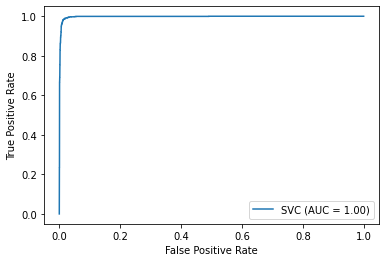

In [ ]:
from sklearn import datasets, metrics, model_selection, svm
metrics.plot_roc_curve(clf, train_vectorized, y_train)  


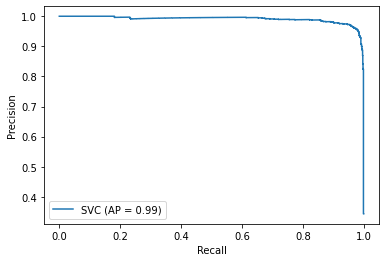

In [ ]:
metrics.plot_precision_recall_curve(clf, train_vectorized, y_train)


##**Roc and precison recall curve for test data.**

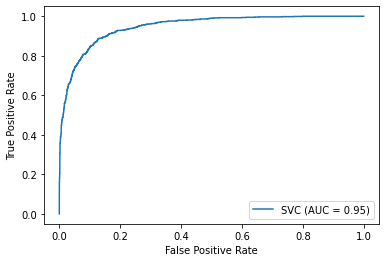

In [ ]:
metrics.plot_roc_curve(clf, test_vectorized, y_test)


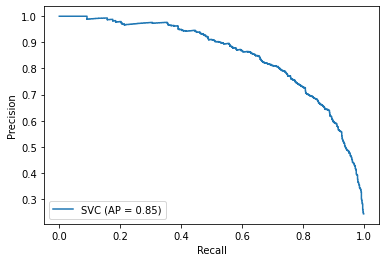

In [ ]:
metrics.plot_precision_recall_curve(clf, test_vectorized, y_test)

In [ ]:
# Print the classification report for train and test
print(classification_report(y_train,train_pred))
print("\n")
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

    negative       0.97      1.00      0.98      5506
    positive       0.98      0.88      0.93      1418

    accuracy                           0.97      6924
   macro avg       0.98      0.94      0.96      6924
weighted avg       0.97      0.97      0.97      6924



              precision    recall  f1-score   support

    negative       0.91      0.98      0.94      3672
    positive       0.87      0.60      0.71       945

    accuracy                           0.90      4617
   macro avg       0.89      0.79      0.83      4617
weighted avg       0.90      0.90      0.89      4617



##Grid search cv

In [ ]:
from sklearn.model_selection import GridSearchCV 


In [ ]:
param_dict = {'C': [0.1, 1, 10, 1000],  
              'gamma': [1, 0.1, 0.01, 0.0001], 
              'kernel': ['rbf','linear','poly']} 

In [ ]:
grid = GridSearchCV(clf, param_dict,n_jobs=2, cv=5, verbose = 10,scoring='accuracy') 


In [ ]:
grid.fit(train_vectorized,y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    8.8s
[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:   16.5s
[Parallel(n_jobs=2)]: Done   9 tasks      | elapsed:   26.1s
[Parallel(n_jobs=2)]: Done  14 tasks      | elapsed:   39.4s
[Parallel(n_jobs=2)]: Done  21 tasks      | elapsed:   54.3s
[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:  1.2min
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:  1.4min
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:  1.6min
[Parallel(n_jobs=2)]: Done  57 tasks      | elapsed:  1.9min
[Parallel(n_jobs=2)]: Done  68 tasks      | elapsed:  2.4min
[Parallel(n_jobs=2)]: Done  81 tasks      | elapsed:  3.0min
[Parallel(n_jobs=2)]: Done  94 tasks      | elapsed:  3.5min
[Parallel(n_jobs=2)]: Done 109 tasks      | elapsed:  3.9min
[Parallel(n_jobs=2)]: Done 124 tasks      | elapsed:  4.4min
[Parallel(n_jobs=2)]: Done 141 tasks      | elapsed:  5.3min
[Parallel(

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=2,
             param_grid={'C': [0.1, 1, 10, 1000],
                         'gamma': [1, 0.1, 0.01, 0.0001],
                         'kernel': ['rbf', 'linear', 'poly']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=10)

In [ ]:
grid.best_params_

{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}

In [ ]:
g_pred_tr=grid.predict(train_vectorized)

In [ ]:
g_pred_test=grid.predict(test_vectorized)

In [ ]:
# Confusion matrices for train and test 

print(confusion_matrix(y_train,g_pred_tr))
print(confusion_matrix(y_test,g_pred_test))

[[5467   39]
 [ 117 1301]]
[[3531  141]
 [ 266  679]]


In [ ]:
# Print the classification report for train and test
print(classification_report(y_train,g_pred_tr))
print("\n")
print(classification_report(y_test,g_pred_test))

              precision    recall  f1-score   support

    negative       0.98      0.99      0.99      5506
    positive       0.97      0.92      0.94      1418

    accuracy                           0.98      6924
   macro avg       0.97      0.96      0.96      6924
weighted avg       0.98      0.98      0.98      6924



              precision    recall  f1-score   support

    negative       0.93      0.96      0.95      3672
    positive       0.83      0.72      0.77       945

    accuracy                           0.91      4617
   macro avg       0.88      0.84      0.86      4617
weighted avg       0.91      0.91      0.91      4617



##**Roc and precison recall curve for grid train data.**


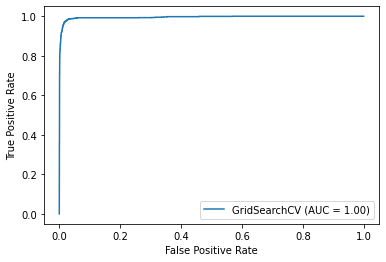

In [ ]:
from sklearn import datasets, metrics, model_selection, svm
metrics.plot_roc_curve(grid, train_vectorized, y_train)  


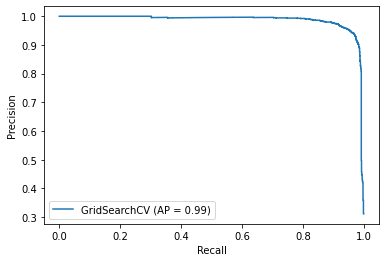

In [ ]:
metrics.plot_precision_recall_curve(grid, train_vectorized, y_train)


##**Roc and precison recall curve for grid test data.**


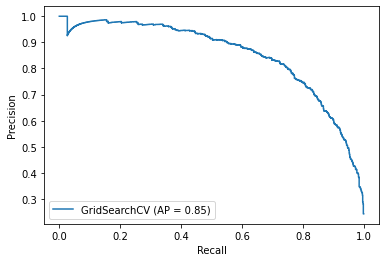

In [ ]:
metrics.plot_precision_recall_curve(grid, test_vectorized, y_test)


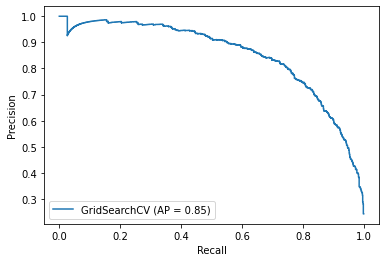

In [ ]:
from sklearn.metrics import plot_precision_recall_curve
plot_precision_recall_curve(grid, test_vectorized, y_test)


##**Vectorize using TFIDF vectorizer.**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf_vectorizer = TfidfVectorizer(use_idf=True, lowercase=True, strip_accents='ascii', stop_words=stopset)

In [ ]:
X = tf_vectorizer.fit_transform(tweet.tokenized_tweet)
y = tweet.airline_sentiment

In [ ]:
max(tf_vectorizer.get_feature_names())


'zurich'

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.4)


In [ ]:
clf_tf = svm.SVC()


In [ ]:
clf_tf.fit(X_train,Y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
tf_train_pred=clf_tf.predict(X_train)

In [ ]:
tf_train_pred

array(['positive', 'negative', 'negative', ..., 'negative', 'negative',
       'positive'], dtype=object)

In [ ]:
tf_test_pred=clf_tf.predict(X_test)

In [ ]:
# Confusion matrices for train and test 

print(confusion_matrix(Y_train,tf_train_pred))
print(confusion_matrix(Y_test,tf_test_pred))

[[5503    5]
 [  72 1344]]
[[3624   46]
 [ 435  512]]


In [ ]:
# Print the classification report for train and test
print(classification_report(y_train,tf_train_pred))
print("\n")
print(classification_report(y_test,tf_test_pred))

              precision    recall  f1-score   support

    negative       0.80      0.81      0.80      5506
    positive       0.21      0.20      0.20      1418

    accuracy                           0.68      6924
   macro avg       0.50      0.50      0.50      6924
weighted avg       0.67      0.68      0.68      6924



              precision    recall  f1-score   support

    negative       0.79      0.88      0.83      3672
    positive       0.18      0.11      0.13       945

    accuracy                           0.72      4617
   macro avg       0.49      0.49      0.48      4617
weighted avg       0.67      0.72      0.69      4617



##**Roc and precison recall curve for Tfidf train data.**


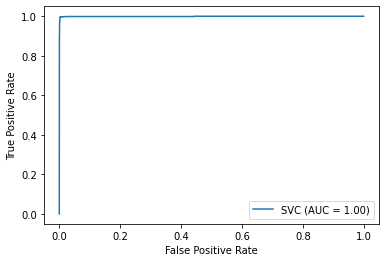

In [ ]:
metrics.plot_roc_curve(clf_tf, X_train, Y_train)


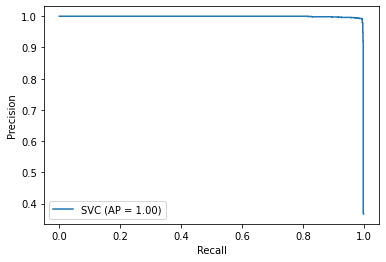

In [ ]:
plot_precision_recall_curve(clf_tf, X_train, Y_train)


##**Roc and precison recall curve for Tfidf test data.**


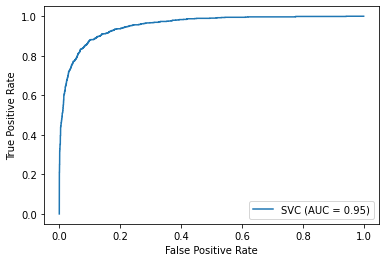

In [ ]:
metrics.plot_roc_curve(clf_tf, X_test, Y_test)


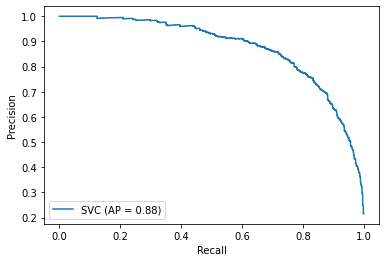

In [ ]:
plot_precision_recall_curve(clf_tf, X_test, Y_test)


##Apply grid parameters

In [ ]:
param_dict = {'C': [0.1, 1, 10, 1000],  
              'gamma': [1, 0.1, 0.01, 0.0001], 
              'kernel': ['rbf','linear','poly']} 



In [ ]:
grid_tf = GridSearchCV(clf, param_dict,n_jobs=2, cv=5, verbose = 10,scoring='accuracy') 


In [ ]:
grid_tf.fit(X_train,Y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    5.0s
[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:   10.0s
[Parallel(n_jobs=2)]: Done   9 tasks      | elapsed:   19.1s
[Parallel(n_jobs=2)]: Done  14 tasks      | elapsed:   34.9s
[Parallel(n_jobs=2)]: Done  21 tasks      | elapsed:   49.0s
[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:   58.8s
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:  1.2min
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:  1.4min
[Parallel(n_jobs=2)]: Done  57 tasks      | elapsed:  1.7min
[Parallel(n_jobs=2)]: Done  68 tasks      | elapsed:  2.1min
[Parallel(n_jobs=2)]: Done  81 tasks      | elapsed:  2.6min
[Parallel(n_jobs=2)]: Done  94 tasks      | elapsed:  3.0min
[Parallel(n_jobs=2)]: Done 109 tasks      | elapsed:  3.3min
[Parallel(n_jobs=2)]: Done 124 tasks      | elapsed:  3.8min
[Parallel(n_jobs=2)]: Done 141 tasks      | elapsed:  4.5min
[Parallel(

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=2,
             param_grid={'C': [0.1, 1, 10, 1000],
                         'gamma': [1, 0.1, 0.01, 0.0001],
                         'kernel': ['rbf', 'linear', 'poly']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=10)

In [ ]:
gridtf_train_pred=grid_tf.predict(X_train)

In [ ]:
gridtf_test_pred=grid_tf.predict(X_test)

In [ ]:
# Confusion matrices for train and test 

print(confusion_matrix(Y_train,gridtf_train_pred))
print(confusion_matrix(Y_test,gridtf_test_pred))

[[5480   28]
 [ 166 1250]]
[[3595   75]
 [ 322  625]]


In [ ]:
# Print the classification report for train and test
print(classification_report(Y_train,gridtf_train_pred))
print("\n")
print(classification_report(Y_test,gridtf_test_pred))

              precision    recall  f1-score   support

    negative       0.97      0.99      0.98      5508
    positive       0.98      0.88      0.93      1416

    accuracy                           0.97      6924
   macro avg       0.97      0.94      0.96      6924
weighted avg       0.97      0.97      0.97      6924



              precision    recall  f1-score   support

    negative       0.92      0.98      0.95      3670
    positive       0.89      0.66      0.76       947

    accuracy                           0.91      4617
   macro avg       0.91      0.82      0.85      4617
weighted avg       0.91      0.91      0.91      4617



##**Roc and precison recall curve for train and test data.**


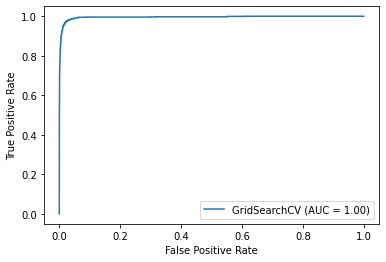

In [ ]:
metrics.plot_roc_curve(grid_tf, X_train, Y_train)


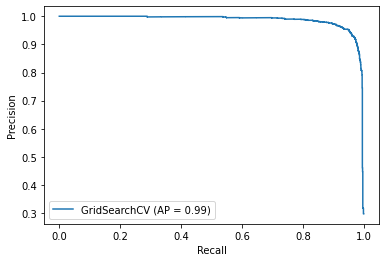

In [ ]:
plot_precision_recall_curve(grid_tf, X_train, Y_train)


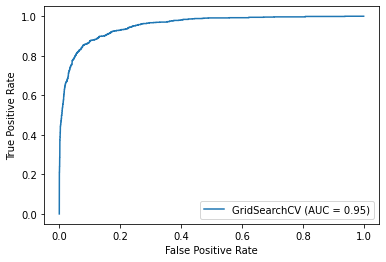

In [ ]:
metrics.plot_roc_curve(grid_tf, X_test, Y_test)


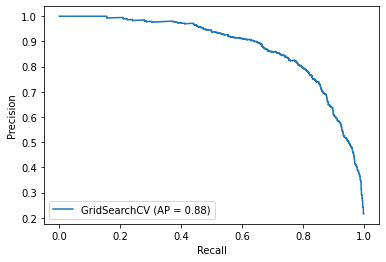

In [ ]:
plot_precision_recall_curve(grid_tf, X_test, Y_test)


##Based on the metrics all the models are doing well on train as well as test data.